In [ ]:
# Import Library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('sample_data/movie.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


### Data Cleansing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
df['budget']=pd.to_numeric(df['budget'],errors='coerce')
df['budget'].dtype

dtype('float64')

In [ ]:
df['release_date']=pd.to_numeric(df['release_date'],errors='coerce')
df['release_date'].dtype

dtype('float64')

In [ ]:
df['budget'].isna().value_counts()
budget= df['budget'].loc[df['budget'].isnull() == False]
budget_mean = budget.mean()
df['budget'] = df['budget'].fillna(budget_mean)

In [ ]:
df['revenue'].isna().value_counts()
revenue= df['revenue'].loc[df['revenue'].isnull() == False]
revenue_mean = revenue.mean()
df['revenue'] = df['revenue'].fillna(revenue_mean)

In [ ]:
runtime= df['runtime'].loc[df['runtime'].isnull() == False]
runtime_mean= runtime.mean()
df['runtime'] = df['runtime'].fillna(runtime_mean)

In [ ]:
vote_average= df['vote_average'].loc[df['vote_average'].isnull() == False]
vote_average_mean= vote_average.mean()
df['vote_average'] = df['vote_average'].fillna(vote_average_mean)

In [ ]:
vote_count= df['vote_count'].loc[df['vote_count'].isnull() == False]
vote_count_mean= vote_count.mean()
df['vote_count'] = df['vote_count'].fillna(vote_average_mean)

In [ ]:
df = df[df['status'].notna()]
df = df[df['belongs_to_collection'].notna()]
df = df[df['homepage'].notna()]
df = df[df['imdb_id'].notna()]
df = df[df['overview'].notna()]
df = df[df['tagline'].notna()]

In [ ]:
df.isna().sum()

adult                      0
belongs_to_collection      0
budget                     0
genres                     0
homepage                   0
id                         0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path                0
production_companies       0
production_countries       0
release_date             693
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                    0
title                      0
video                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 9 to 45029
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  693 non-null    object 
 1   belongs_to_collection  693 non-null    object 
 2   budget                 693 non-null    float64
 3   genres                 693 non-null    object 
 4   homepage               693 non-null    object 
 5   id                     693 non-null    object 
 6   imdb_id                693 non-null    object 
 7   original_language      693 non-null    object 
 8   original_title         693 non-null    object 
 9   overview               693 non-null    object 
 10  popularity             693 non-null    object 
 11  poster_path            693 non-null    object 
 12  production_companies   693 non-null    object 
 13  production_countries   693 non-null    object 
 14  release_date           0 non-null      float64
 15  reve

### Memeriksa Korelasi

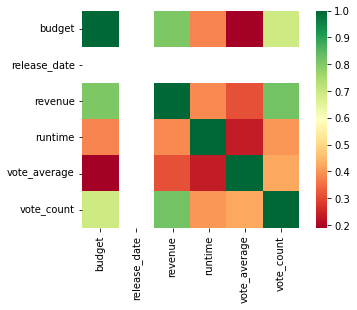

In [ ]:
#plotting heatmap for overall data set
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

### Korelasi Budget dengan Revenue

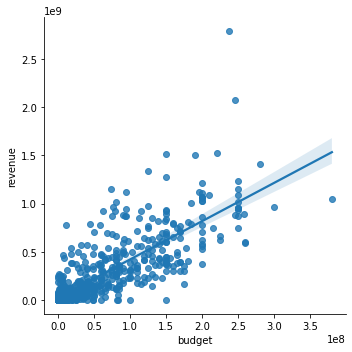

In [ ]:
sns.lmplot(x = 'budget', y = 'revenue', data = df)

### Proses Training dan Membuat Model untuk Radio dan Sales
Selanjutnya, kita akan melakukan training untuk membuat modelnya dari Budget dan Revenue.

In [ ]:
# Persiapkan data 
X = df[['budget']]
y = df[['revenue']]

In [ ]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [ ]:
#Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor_budget = LinearRegression()
# Lakukan training dari X train dan y train
regressor_budget.fit(X_train, y_train)

LinearRegression()

## Uji coba budget dan revenue

In [ ]:
# Dapetin coef dan intercept buat persamaan regresi (model)
regressor_budget.coef_, regressor_budget.intercept_

(array([[4.01741732]]), array([23730222.64941856]))

In [ ]:
# Asumsikan kita ingin mengeluarkan budget 16 juta
# berapa prediksi revenue yang kita peroleh?
x = 16000000
y = 4.01741732*x + 23730222.64941856
print(y)

88008899.76941855


Uji coba otmatis:

In [ ]:
regressor_budget.predict(X_test)

array([[4.70312431e+07],
       [2.37302226e+07],
       [1.02808455e+09],
       [1.92461750e+08],
       [2.37302226e+07],
       [3.65210695e+08],
       [2.56740427e+08],
       [8.80088998e+07],
       [1.36217908e+08],
       [1.76392081e+08],
       [6.26342821e+08],
       [6.34377656e+08],
       [9.60437345e+07],
       [1.04078569e+08],
       [4.78347266e+07],
       [1.16130821e+08],
       [1.04078569e+08],
       [2.37302226e+07],
       [5.18521439e+07],
       [6.79218132e+07],
       [1.36217908e+08],
       [8.39914825e+07],
       [2.37302226e+07],
       [3.57824746e+07],
       [2.37302226e+07],
       [3.65210695e+08],
       [2.37302226e+07],
       [2.37302226e+07],
       [7.06691168e+08],
       [2.37302226e+07],
       [3.97998919e+07],
       [2.37302226e+07],
       [6.79218132e+07],
       [1.24165656e+08],
       [1.72374664e+08],
       [2.12548837e+08],
       [3.77911833e+07],
       [3.41106191e+08],
       [3.37737660e+07],
       [4.13419703e+08],


## Evaluasi Model

In [ ]:
#check prediction score/accuracy
regressor_budget.score(X_test, y_test)

0.7228548196698258

In [ ]:
# predict the y values
y_pred=regressor_budget.predict(X_test)

# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'actual revenue': y_test.values.flatten(), 'predected revenue': y_pred.flatten()})
evaluate.head(10)

,actual revenue,predected revenue
0,33395426.0,4.703124e+07
1,0.0,2.373022e+07
2,956019788.0,1.028085e+09
3,201585328.0,1.924618e+08
4,0.0,2.373022e+07
5,363164265.0,3.652107e+08
6,783112979.0,2.567404e+08
7,68411275.0,8.800890e+07
8,333000000.0,1.362179e+08
9,29907685.0,1.763921e+08


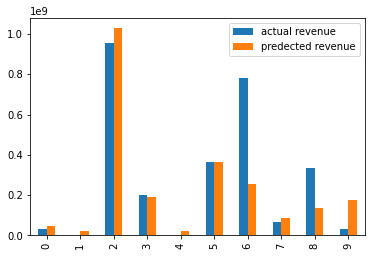

In [ ]:
evaluate.head(10).plot(kind = 'bar')

Perhatikan bahwa sebagian besar nilai prediksi ada yang lebih rendah dari nilai sebenarnya dan ada yang lebih tinggi dari nilai sebenarnya.

## Evaluasi

In [ ]:
# Scoring the model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.7228548196698258
MSE score: 2.5739726859093052e+16


### Plotting Hasil Prediksi

Text(0.5, 1.0, 'Plot budget vs revenue')

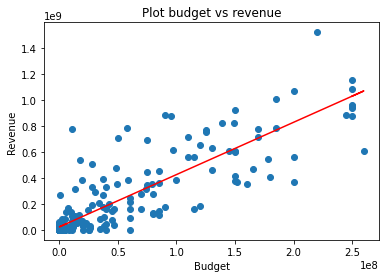

In [ ]:
y_predict = regressor_radio.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, c='r')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Plot budget vs revenue')

Hasilnya menunjukkan bahwa hasil pengujian juga menunjukkan korelasi yang mirip dengan korelasi sebelumnya.